<a href="https://colab.research.google.com/github/ImmarGaneru/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import GDrive




In [20]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import library

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image

### Membuat fungsi konvolusi

In [22]:
def convolution(image, kernel, stride, padding):
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    output_height = ((img_height - kernel_height + 2 * padding) // stride) + 1
    output_width = ((img_width - kernel_width + 2 * padding) // stride) + 1

    output = np.zeros((output_height, output_width))

    for i in range(0, output_height):
        for j in range(0, output_width):
            row_start = i * stride
            row_end = row_start + kernel_height
            col_start = j * stride
            col_end = col_start + kernel_width

            region = image[row_start:row_end, col_start:col_end]
            output[i, j] = np.sum(region * kernel)

            output = np.clip(output, 0, 255)

    return output


### Load image

In [23]:
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

### Kernel

In [24]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

kernel_emboss = np.array([[-2,-1,0],
                         [-1,1,1],
                         [0,1,2]])

kernel_sobel_left = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

kernel_prewitt_x = np.array([[-1,-1,-1],
                         [0,0,0],
                         [1,1,1]])

kernel_gaussian_5x5 = np.array([[1,  4,  6,  4,  1],
                                [4, 16, 24, 16,  4],
                                [6, 24, 36, 24,  6],
                                [4, 16, 24, 16,  4],
                                [1,  4,  6,  4,  1]]) / 256

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

### Sharpen

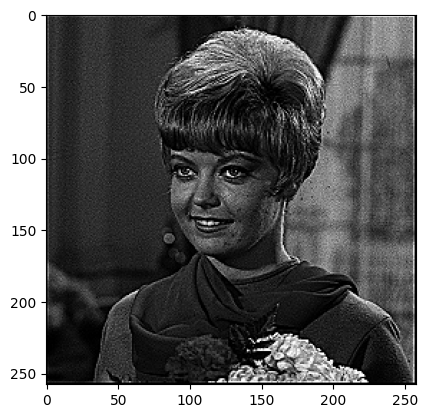

In [25]:
sharpen = convolution(img_gray, kernel_sharpen, 1, 2)

plt.imshow(sharpen, cmap='gray')
plt.show()

### Emboss

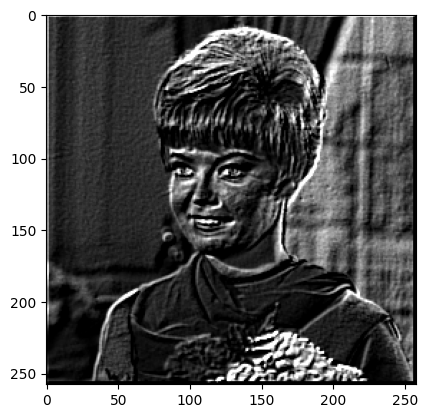

In [27]:
emboss = convolution(img_gray, kernel_emboss, 1, 2)

plt.imshow(emboss, cmap='gray')
plt.show()

### Left Sobel Edge Detection

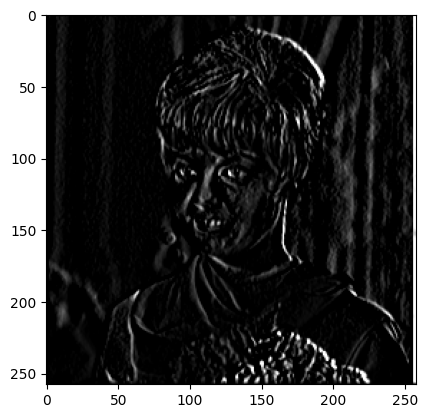

In [28]:
sobel = convolution(img_gray, kernel_sobel_left, 1, 2)

plt.imshow(sobel, cmap='gray')
plt.show()

### Canny Edge Detection

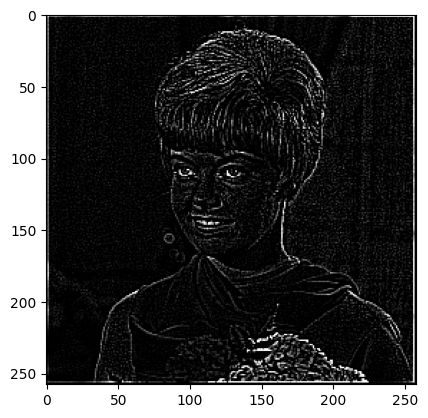

In [29]:
canny = convolution(img_gray, kernel_canny, 1, 2)

plt.imshow(canny, cmap='gray')
plt.show()

### Prewitt Edge Detection

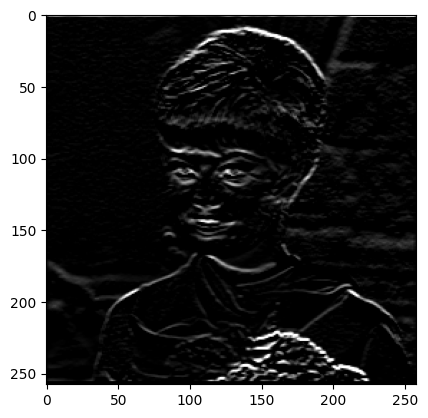

In [30]:
prewitt = convolution(img_gray, kernel_prewitt_x, 1, 2)

plt.imshow(prewitt, cmap='gray')
plt.show()

### 5x5 Gaussian Blur

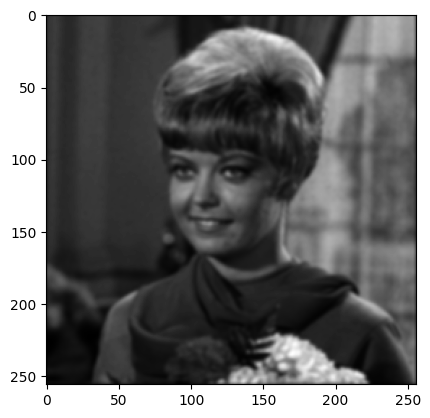

In [31]:
gaussian_5x5 = convolution(img_gray, kernel_gaussian_5x5, 1, 2)

plt.imshow(gaussian_5x5, cmap='gray')
plt.show()

### 21x21 Gaussian Blur

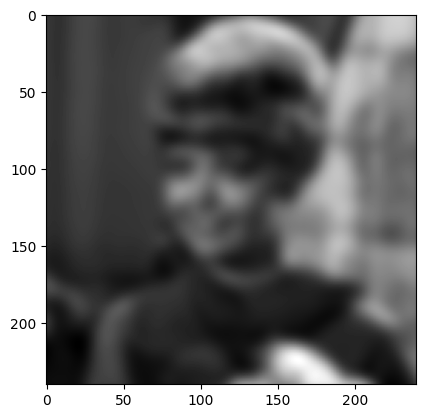

In [32]:
gaussian_21x21 = convolution(img_gray, gauss_kernel, 1, 2)

plt.imshow(gaussian_21x21, cmap='gray')
plt.show()